In [2]:
# All imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge, Lasso
from modules import *

In [3]:
pd.set_option('display.max_columns', None)

## Load the dataset

In [4]:
filepath = './Data/OnlineNewsPopularity.csv'

df = load_data(filepath)


Shape of the dataset: (39644, 61)

Data Types and Non-Null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            39644 non-null  object 
 1   timedelta                      39644 non-null  float64
 2   n_tokens_title                 39644 non-null  float64
 3   n_tokens_content               39644 non-null  float64
 4   n_unique_tokens                39644 non-null  float64
 5   n_non_stop_words               39644 non-null  float64
 6   n_non_stop_unique_tokens       39644 non-null  float64
 7   num_hrefs                      39644 non-null  float64
 8   num_self_hrefs                 39644 non-null  float64
 9   num_imgs                       39644 non-null  float64
 10  num_videos                     39644 non-null  float64
 11  average_token_length           39644 n

#### The dataset does not contain any missing values as seen above. As the next step we'll perform Exploratory Data Analysis to understand the data distribution further.

### Exploratory Data Analysis

In [5]:
# Statistical summary of numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
timedelta,39643.0,354.535832,214.163808,8.000000,164.000000,339.000000,542.000000,731.000000
n_tokens_title,39643.0,10.398784,2.114052,2.000000,9.000000,10.000000,12.000000,23.000000
n_tokens_content,39643.0,546.488914,471.085404,0.000000,246.000000,409.000000,716.000000,8474.000000
n_unique_tokens,39643.0,0.530547,0.137112,0.000000,0.470867,0.539216,0.608696,1.000000
n_non_stop_words,39643.0,0.970209,0.170012,0.000000,1.000000,1.000000,1.000000,1.000000
n_non_stop_unique_tokens,39643.0,0.672796,0.154035,0.000000,0.625733,0.690476,0.754624,1.000000
num_hrefs,39643.0,10.883687,11.332160,0.000000,4.000000,8.000000,14.000000,304.000000
num_self_hrefs,39643.0,3.293469,3.855043,0.000000,1.000000,3.000000,4.000000,116.000000
num_imgs,39643.0,4.542971,8.306262,0.000000,1.000000,1.000000,4.000000,128.000000
num_videos,39643.0,1.249905,4.107902,0.000000,0.000000,0.000000,1.000000,91.000000


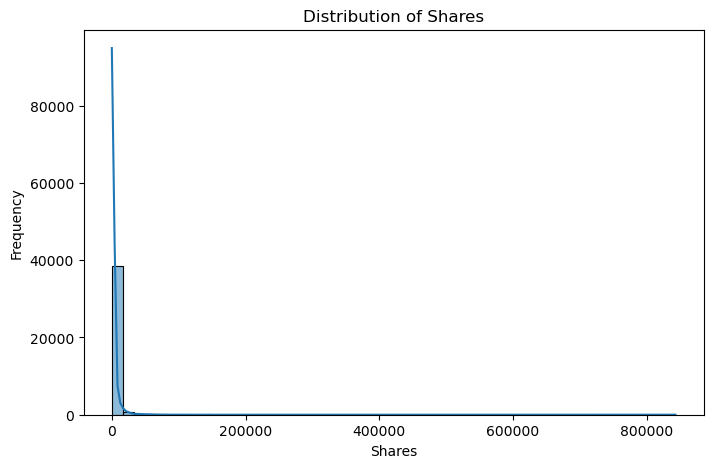

In [6]:
# Distribution of the target variable
plt.figure(figsize=(8, 5))
sns.histplot(df['shares'], bins=50, kde=True)
plt.title('Distribution of Shares')
plt.xlabel('Shares')
plt.ylabel('Frequency')
plt.show()

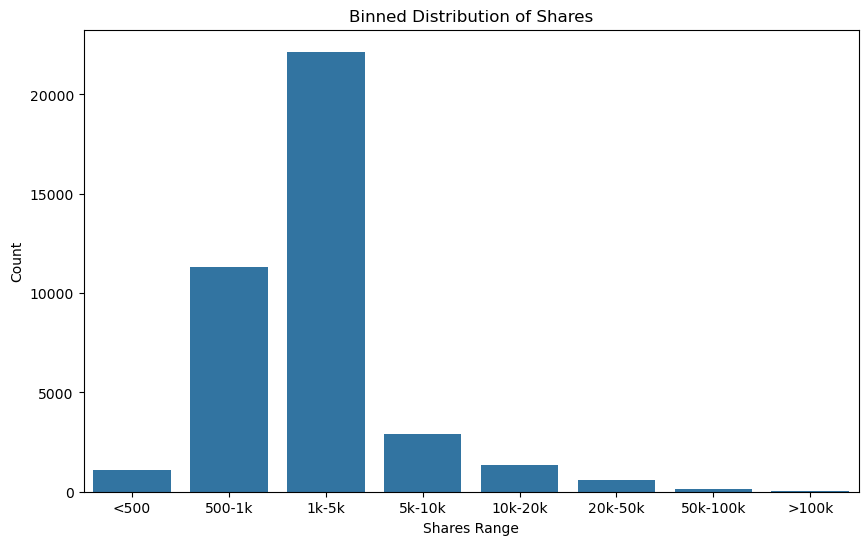

In [7]:
# Create bins
bins = [0, 500, 1000, 5000, 10000, 20000, 50000, 100000, df['shares'].max()]
labels = ['<500', '500-1k', '1k-5k', '5k-10k', '10k-20k', '20k-50k', '50k-100k', '>100k']
df1 = df.copy()
df1['shares_binned'] = pd.cut(df1['shares'], bins=bins, labels=labels)

# Bar plot
plt.figure(figsize=(10, 6))
sns.countplot(x='shares_binned', data=df1, order=labels)
plt.title('Binned Distribution of Shares')
plt.xlabel('Shares Range')
plt.ylabel('Count')
plt.show()

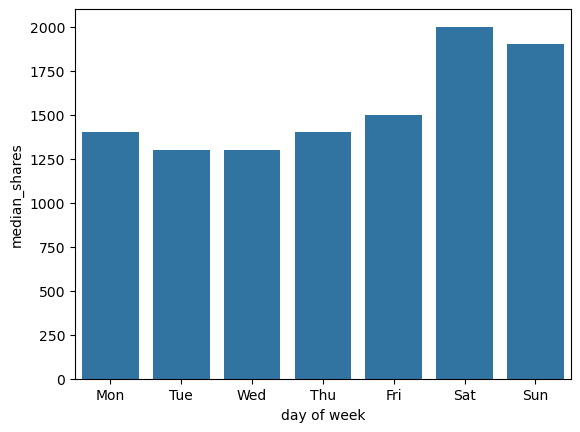

In [8]:
# Median shares by weekdays
shares = []
for d in ['weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday','weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
       'weekday_is_sunday']:
    shares.append(df[df[d]==1]['shares'].median())

ax = sns.barplot(x= ['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], y= shares)
ax.set(xlabel='day of week', ylabel='median_shares')
plt.show()

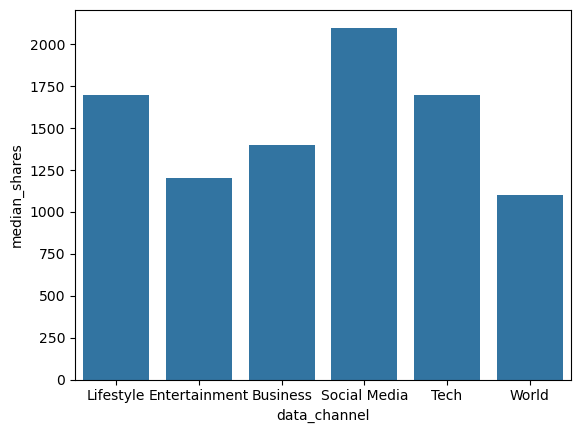

In [9]:
# Median shares by channel
channel = []
for d in ['data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world']:
    channel.append(df[df[d]==1]['shares'].median())

ax = sns.barplot(x= ['Lifestyle',
       'Entertainment', 'Business',
       'Social Media', 'Tech',
       'World'], y= channel)
ax.set(xlabel='data_channel', ylabel='median_shares')
plt.show()

In [10]:
 (df['shares'] == 0).sum()

0

#### Observations

- As we can see above, the data is highly skewed, that is we have maximum shares below 5000, with some viral articles shared over 100000 times.
- To avoid the effect of extreme outliers on model development, the extreme values (95th percentile and above) can be capped to maintain the information while limiting the effect of outliers.
- Log transformation can be applied on the shares variable to reduce the effect of the skewness. No non-positives are present in the shares column so no cleaning is required before applying log transformation to the data
- Next, we will cap the extreme outliers from the dataset (95th percentile) to avoid impact on model performance

In [11]:
# Calculate the 95th percentile for the 'shares' column
percentile_95 = np.percentile(df['shares'], 95)

# Display the original and capped shares statistics for comparison
original_stats = df['shares'].describe()

# Cap the 'shares' column at the 95th percentile
df['shares'] = df['shares'].clip(upper=percentile_95)

capped_stats = df['shares'].describe()

original_stats, capped_stats

(count     39643.000000
 mean       3395.317004
 std       11627.090592
 min           1.000000
 25%         946.000000
 50%        1400.000000
 75%        2800.000000
 max      843300.000000
 Name: shares, dtype: float64,
 count    39643.000000
 mean      2510.268042
 std       2634.962345
 min          1.000000
 25%        946.000000
 50%       1400.000000
 75%       2800.000000
 max      10800.000000
 Name: shares, dtype: float64)

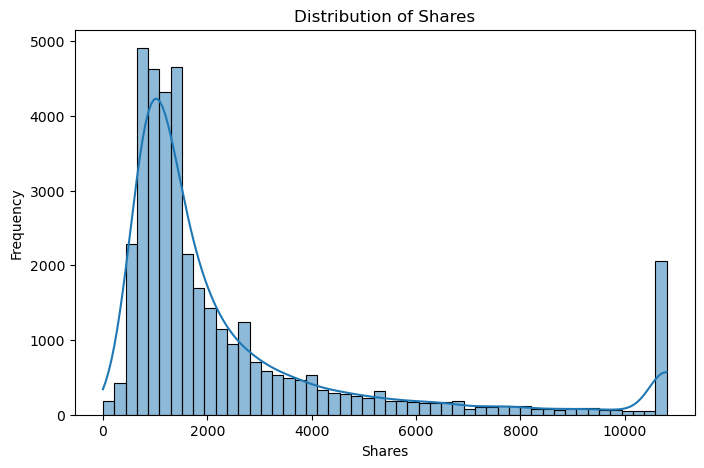

In [12]:
# Distribution of the target variable
plt.figure(figsize=(8, 5))
sns.histplot(df['shares'], bins=50, kde=True)
plt.title('Distribution of Shares')
plt.xlabel('Shares')
plt.ylabel('Frequency')
plt.show()

### Correlation Analysis

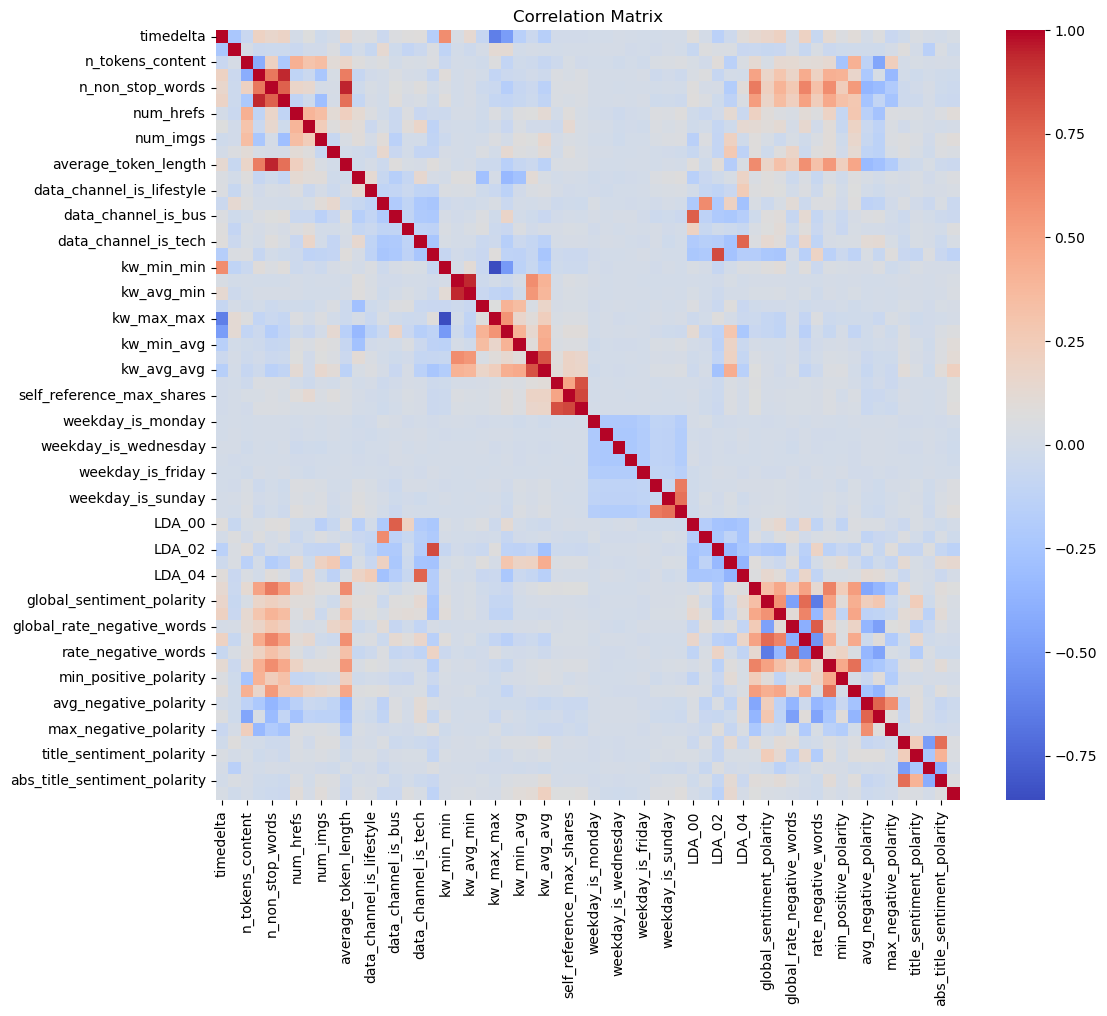

In [13]:
# Correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [14]:
# Flatten the correlation matrix and filter for high correlations
corr_pairs = correlation_matrix.unstack().sort_values(key=abs, ascending=False).drop_duplicates()
high_corr_pairs = corr_pairs[(corr_pairs.abs() > 0.2) & (corr_pairs.abs() < 1)]  # Exclude self-correlation

# Convert to DataFrame for better readability
high_corr_df = high_corr_pairs.reset_index()
high_corr_df.columns = ['Feature 1', 'Feature 2', 'Correlation']
print(high_corr_df.head(30))  # Display top 20 pairs

                        Feature 1                     Feature 2  Correlation
0                n_non_stop_words          average_token_length     0.943846
1                      kw_max_min                    kw_avg_min     0.940529
2        n_non_stop_unique_tokens               n_unique_tokens     0.937679
3                      kw_min_min                    kw_max_max    -0.857226
4      self_reference_avg_sharess     self_reference_max_shares     0.853481
5           data_channel_is_world                        LDA_02     0.836617
6       self_reference_min_shares    self_reference_avg_sharess     0.818907
7                      kw_max_avg                    kw_avg_avg     0.811864
8      global_rate_negative_words           rate_negative_words     0.779541
9             data_channel_is_bus                        LDA_00     0.774650
10       n_non_stop_unique_tokens              n_non_stop_words     0.765382
11           data_channel_is_tech                        LDA_04     0.749736

#### Based on the correlation values, we see high multicollinearity (>0.8) between certain features as noted above. 

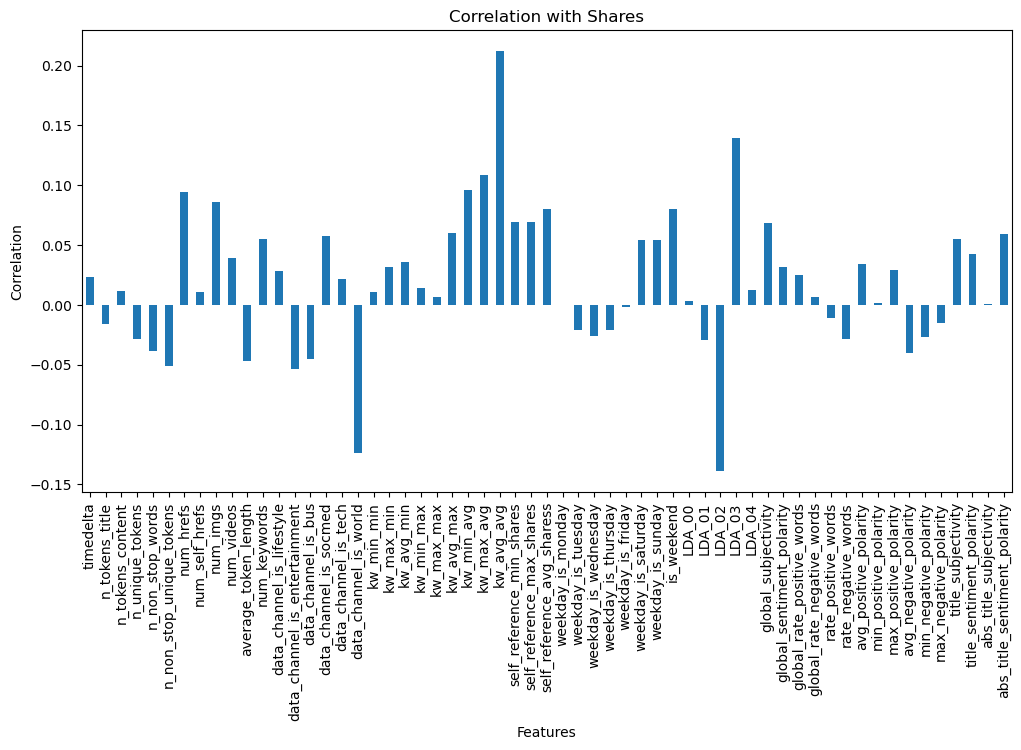

In [15]:
# Correlation with the target variable
# Barplot for correlation with target
plt.figure(figsize=(12, 6))
target_corr = correlation_matrix['shares']
target_corr[:-1].plot(kind='bar')
plt.title('Correlation with Shares')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.show()

###  We observe that none of the features have a strong correlation with the target variable 'shares'

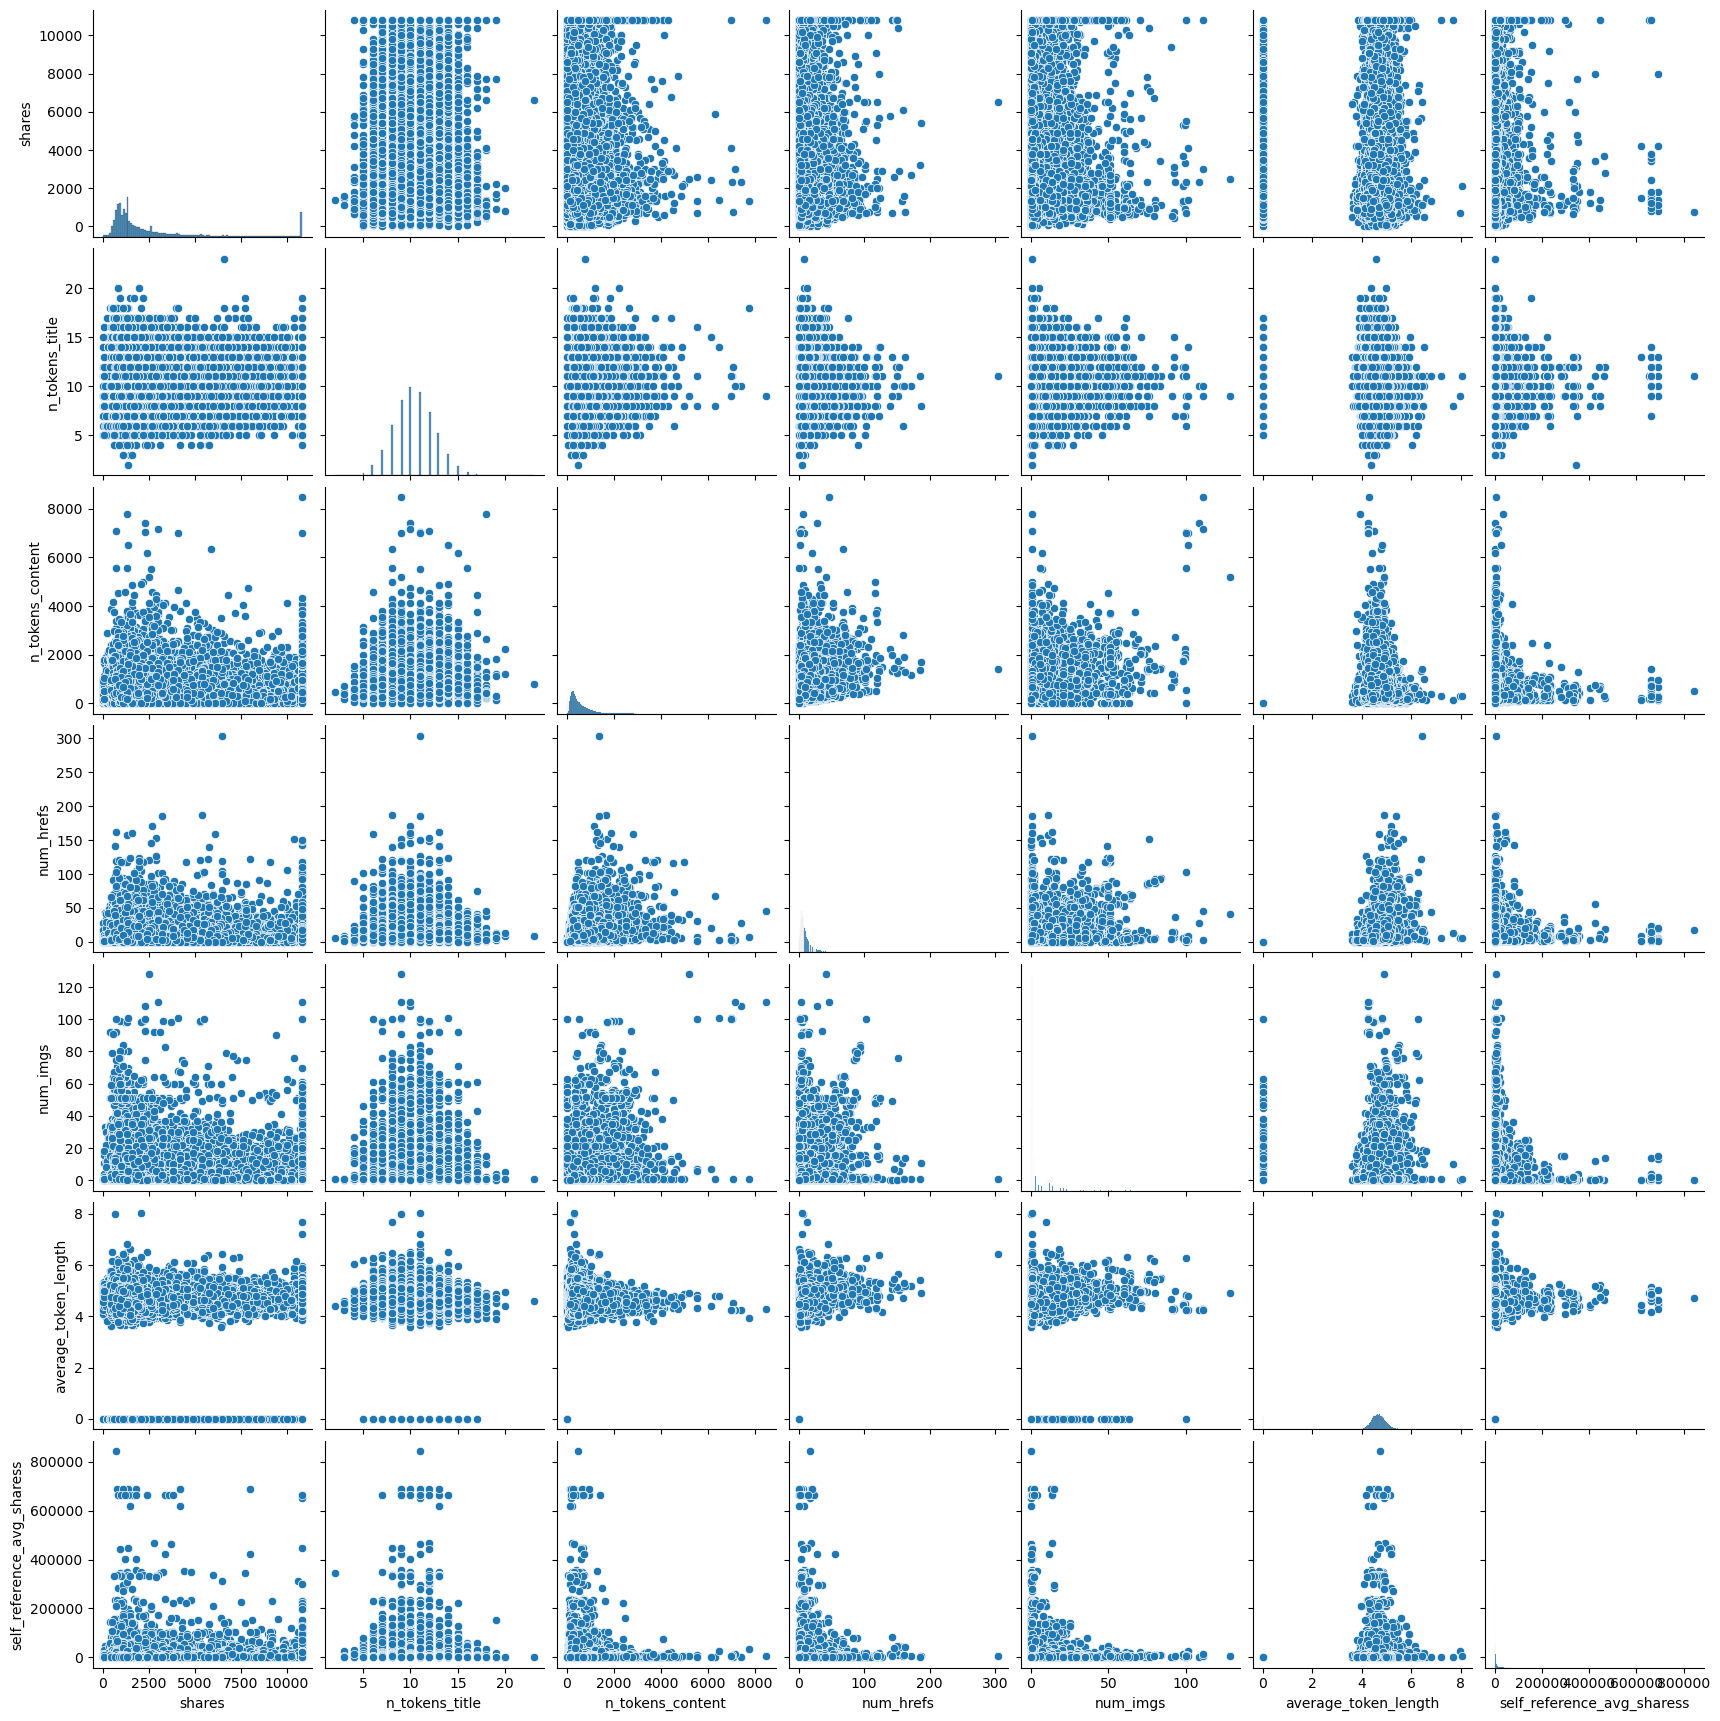

In [16]:
# Select a subset of features (based on correlation)
subset_features = ['shares', 'n_tokens_title', 'n_tokens_content', 'num_hrefs', 'num_imgs', 'average_token_length', 'self_reference_avg_sharess']

# Create pairplot
sns.pairplot(df[subset_features])
plt.show()

### Baseline Random Forest Regressor model

Model Evaluation Metrics:
Mean Absolute Error (MAE): 1748.9205
Mean Squared Error (MSE): 6195930.2383
Root Mean Squared Error (RMSE): 2489.1626
Mean Absolute Percentage Error (MAPE): 1.1916
R-Squared (R²): 0.1023


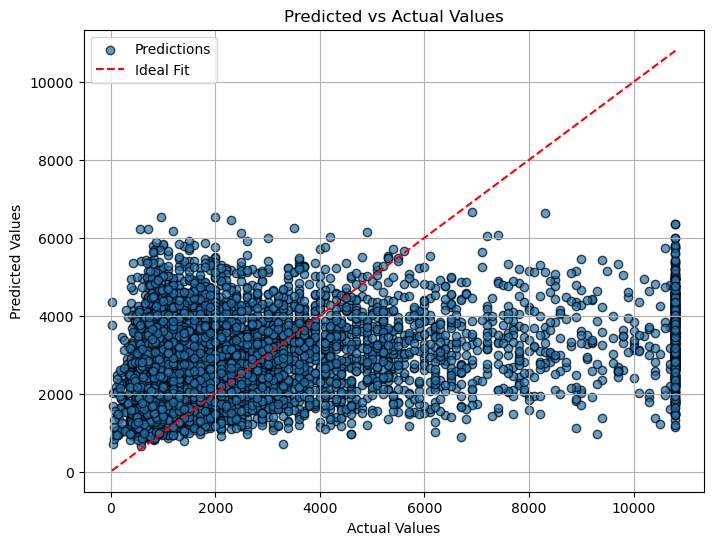

In [17]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = split_data(df, target_column='shares', scale=False)

# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)  
# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
rf_metrics = evaluate_model(X_test, y_test, y_pred, plot_results=True)

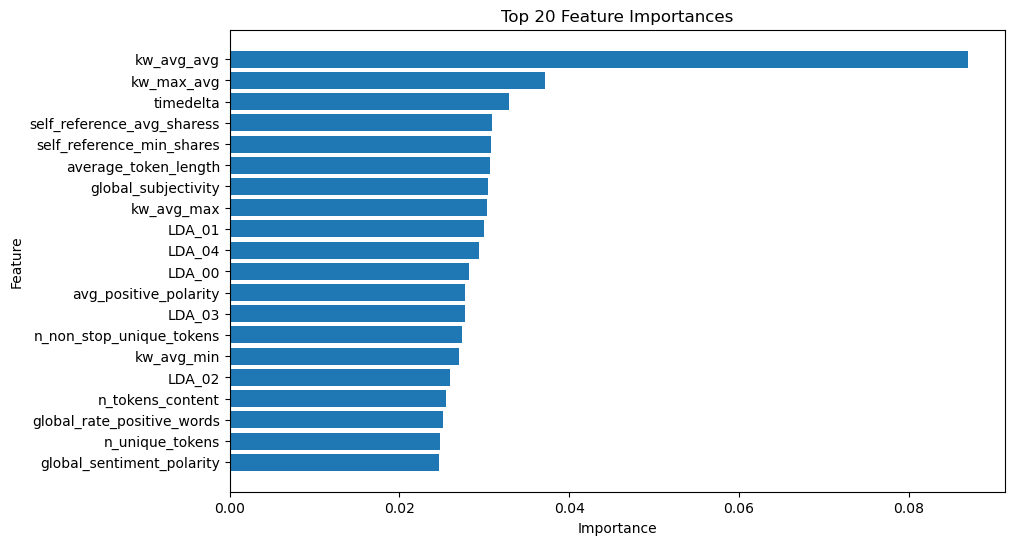

In [18]:
# Extract feature importances
feature_importances = rf_model.feature_importances_
features = X_train.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the top features
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:20], importance_df['Importance'][:20])
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 20 Feature Importances')
plt.show()

### Feature Engineering

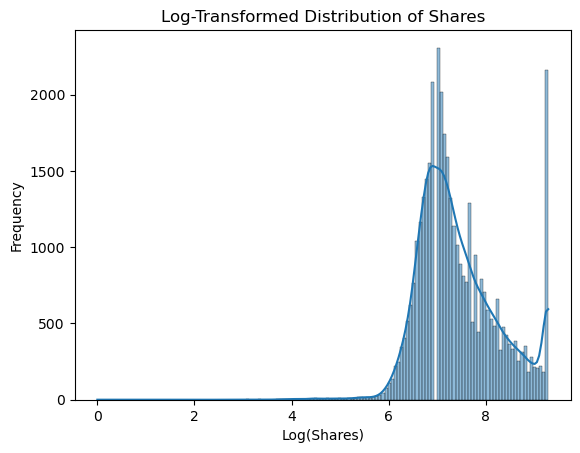

In [19]:
# Plot the log-transformed distribution of 'shares' using histplot
sns.histplot(df['shares'].apply(np.log), kde=True)
plt.title('Log-Transformed Distribution of Shares')
plt.xlabel('Log(Shares)')
plt.ylabel('Frequency')
plt.show()

In [20]:
# List of features to drop
features_to_drop = [
    'n_non_stop_words',
    'n_non_stop_unique_tokens',
    'self_reference_max_shares',
    'self_reference_min_shares',
    'kw_max_min',
    'kw_min_min',
    'kw_min_max',
    'kw_max_avg',
    'kw_min_avg',
    'min_negative_polarity',
    'max_positive_polarity',
    'rate_negative_words',
    'rate_positive_words',
    'title_subjectivity',
    'weekday_is_sunday',
    'weekday_is_saturday',
    'global_rate_negative_words',
    'global_rate_positive_words',
    'rate_negative_words',
    'rate_positive_words',
    'n_unique_tokens',
    'average_token_length'
]

df = drop_features(df, features_to_drop)

In [21]:
# Check for non-positive values in the 'shares' column
non_positive_values_count = (df['shares'] <= 0).sum()

print(f"Number of non-positive values in 'shares': {non_positive_values_count}")

Number of non-positive values in 'shares': 0


In [22]:
# Correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()

# Flatten the correlation matrix and filter for high correlations
corr_pairs = correlation_matrix.unstack().sort_values(key=abs, ascending=False).drop_duplicates()
high_corr_pairs = corr_pairs[(corr_pairs.abs() > 0.2) & (corr_pairs.abs() < 1)]  # Exclude self-correlation

# Convert to DataFrame for better readability
high_corr_df = high_corr_pairs.reset_index()
high_corr_df.columns = ['Feature 1', 'Feature 2', 'Correlation']
print(high_corr_df.head(30))  # Display top 20 pairs

                       Feature 1                      Feature 2  Correlation
0          data_channel_is_world                         LDA_02     0.836617
1            data_channel_is_bus                         LDA_00     0.774650
2                         LDA_04           data_channel_is_tech     0.749736
3                     kw_max_max                      timedelta    -0.637823
4          avg_positive_polarity            global_subjectivity     0.631631
5                         LDA_01  data_channel_is_entertainment     0.599457
6          avg_negative_polarity          max_negative_polarity     0.580090
7                     kw_avg_max                     kw_max_max     0.563350
8      global_sentiment_polarity          avg_positive_polarity     0.496680
9                     kw_avg_max                      timedelta    -0.493088
10         avg_positive_polarity          min_positive_polarity     0.456935
11           global_subjectivity          avg_negative_polarity    -0.443096

<Figure size 1200x1000 with 0 Axes>

### Model Training

#### Model 1 - Random Forest Regressor (with fine tuning)

In [23]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid
param_distributions = {
    'n_estimators': [50, 100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Initialize RandomizedSearchCV
rf_random = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_distributions,
    n_iter=50,  # Number of parameter combinations to try
    cv=3,  # 3-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all processors
)

X_train, X_test, y_train, y_test = split_data(df, scale=False)
y_train_log = np.log(y_train)

# Fit to data
rf_random.fit(X_train, y_train_log)

# Best parameters and score
print("Best Parameters:", rf_random.best_params_)
print("Best Cross-Validated Score:", rf_random.best_score_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   5.5s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=  30.3s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=  10.2s
[CV] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=  15.4s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   1.8s
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   7.8s
[CV] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=300; 

/opt/anaconda3/envs/e4_trainor_python_course/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   2.6s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   5.8s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=  30.4s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   5.0s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   4.7s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=  24.1s
[CV] END bootstrap=True, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  11.6s
[CV] END bootstrap=True, max_depth=

In [24]:
# Best Parameters: {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': None, 'bootstrap': False}
# Make predictions on the log-transformed scale
y_pred_log = rf_random.predict(X_test)

# Back-transform predictions to the original scale
y_pred = np.exp(y_pred_log)

In [25]:
# Predictions and evaluation
print("*********** Random Forest Regressor Evaluation Metrics ***********")
rf_metrics = evaluate_model(X_test, y_test, y_pred, plot_results=False)

*********** Random Forest Regressor Evaluation Metrics ***********
Model Evaluation Metrics:
Mean Absolute Error (MAE): 1456.5705
Mean Squared Error (MSE): 6563569.5576
Root Mean Squared Error (RMSE): 2561.9464
Mean Absolute Percentage Error (MAPE): 0.6701
R-Squared (R²): 0.0490


#### Model 2 - Linear Regression

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Splitting the data
X_train, X_test, y_train, y_test = split_data(df, scale=True)
y_train_log = np.log(y_train)

# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train_log)

# Make predictions on the log-transformed scale
y_pred_log = lr_model.predict(X_test)

# Back-transform predictions to the original scale
y_pred = np.exp(y_pred_log)

In [27]:
# Evaluate the model on the original scale
lr_metrics = evaluate_model(X_test, y_test, y_pred, plot_results=False)

Model Evaluation Metrics:
Mean Absolute Error (MAE): 1512.2399
Mean Squared Error (MSE): 7215327.7814
Root Mean Squared Error (RMSE): 2686.1362
Mean Absolute Percentage Error (MAPE): 0.7152
R-Squared (R²): -0.0454


### Analyzing variance inflation factor

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF
X_numeric = pd.DataFrame(X_train, columns=df.drop(columns=['shares']).columns)  # Ensure X is a DataFrame
vif_data = pd.DataFrame()
vif_data["Feature"] = X_numeric.columns
vif_data["VIF"] = [variance_inflation_factor(X_numeric.values, i) for i in range(X_numeric.shape[1])]

print(vif_data)

                          Feature           VIF
0                       timedelta  2.011019e+00
1                  n_tokens_title  1.127327e+00
2                n_tokens_content  1.810331e+00
3                       num_hrefs  1.545729e+00
4                  num_self_hrefs  1.326887e+00
5                        num_imgs  1.412067e+00
6                      num_videos  1.205209e+00
7                    num_keywords  1.399085e+00
8       data_channel_is_lifestyle  2.316862e+00
9   data_channel_is_entertainment  2.708379e+00
10            data_channel_is_bus  5.580691e+00
11         data_channel_is_socmed  2.250577e+00
12           data_channel_is_tech  6.072225e+00
13          data_channel_is_world  6.857516e+00
14                     kw_avg_min  1.469791e+00
15                     kw_max_max  2.244407e+00
16                     kw_avg_max  3.113352e+00
17                     kw_avg_avg  2.274714e+00
18     self_reference_avg_sharess  1.042924e+00
19              weekday_is_monday  2.059

In [29]:
# Drop features with high VIF (e.g., >10)
high_vif_features = vif_data[vif_data["VIF"] > 10]["Feature"]

In [30]:
# Splitting the data
X_train, X_test, y_train, y_test = split_data(df.drop(columns=high_vif_features), scale=True)
y_train_log = np.log(y_train)

# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train_log)

# Make predictions on the log-transformed scale
y_pred_log = lr_model.predict(X_test)

# Back-transform predictions to the original scale
y_pred = np.exp(y_pred_log)

In [31]:
# Evaluate the model on the original scale
print("*********** Linear Regressor Evaluation Metrics after removing high VIF features ***********")
lr_metrics = evaluate_model(X_test, y_test, y_pred, plot_results=False)

*********** Linear Regressor Evaluation Metrics after removing high VIF features ***********
Model Evaluation Metrics:
Mean Absolute Error (MAE): 1522.7420
Mean Squared Error (MSE): 7382179.0880
Root Mean Squared Error (RMSE): 2717.0166
Mean Absolute Percentage Error (MAPE): 0.7282
R-Squared (R²): -0.0696


### Ridge Regression

In [32]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = split_data(df.drop(columns=high_vif_features), scale=True)
y_train_log = np.log(y_train)

ridge = Ridge()
params = {'alpha': [0.1, 1.0, 10, 100]}  # Regularization strength
ridge_cv = GridSearchCV(ridge, params, cv=5, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train, y_train_log)

print("Best Alpha (Ridge):", ridge_cv.best_params_['alpha'])
print("Best MSE (Ridge):", -ridge_cv.best_score_)

Best Alpha (Ridge): 100
Best MSE (Ridge): 0.6336753244175062


In [33]:
# Train the Ridge model with the best alpha
ridge_final_model = Ridge(alpha=ridge_cv.best_params_['alpha'])
ridge_final_model.fit(X_train, y_train_log)

# Evaluate the model
y_pred_log = ridge_final_model.predict(X_test)

# Back-transform predictions to the original scale
y_pred = np.exp(y_pred_log)

In [34]:
# Evaluate the model on the original scale
print("*********** Ridge Regressor Evaluation Metrics ***********")
ridge_model_metrics = evaluate_model(X_test, y_test, y_pred, plot_results=False)

*********** Ridge Regressor Evaluation Metrics ***********
Model Evaluation Metrics:
Mean Absolute Error (MAE): 1522.6165
Mean Squared Error (MSE): 7372987.9798
Root Mean Squared Error (RMSE): 2715.3247
Mean Absolute Percentage Error (MAPE): 0.7281
R-Squared (R²): -0.0682


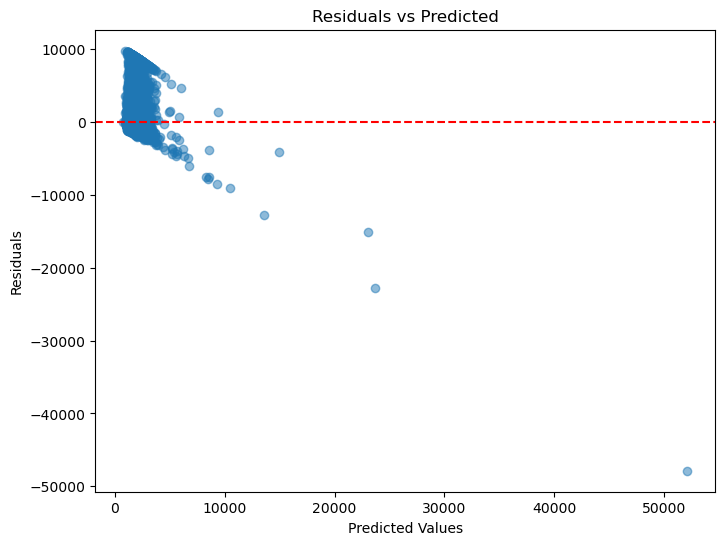

In [35]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residuals vs Predicted")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

### Model 3 - XGB Regressor

*********** Extreme Gradient Boosting Regressor Evaluation Metrics ***********
Model Evaluation Metrics:
Mean Absolute Error (MAE): 1456.1183
Mean Squared Error (MSE): 6502616.8175
Root Mean Squared Error (RMSE): 2550.0229
Mean Absolute Percentage Error (MAPE): 0.6615
R-Squared (R²): 0.0579


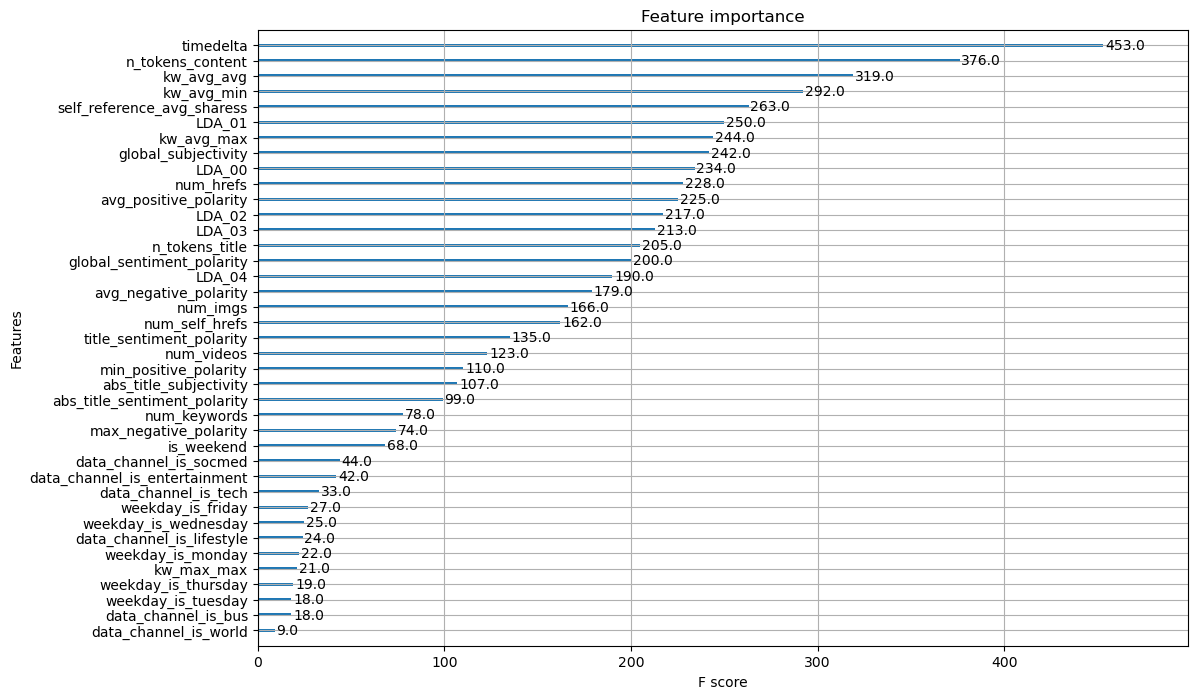

In [36]:
import xgboost as xgb
from xgboost import plot_importance

# Example: Preparing the dataset
# Assuming df is a DataFrame with features and target column 'shares'
X = df.drop(columns=['shares'])  # Features
y = df['shares']  # Target

# Log-transform the target variable to stabilize variance
y = np.log1p(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost DMatrices (optional for better performance in XGBoost)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# XGBoost model parameters
params = {
    "objective": "reg:squarederror",  # Use squared error for regression
    "learning_rate": 0.1,            # Step size shrinkage
    "max_depth": 6,                  # Maximum tree depth
    "n_estimators": 100,             # Number of boosting rounds
    "subsample": 0.8,                # Fraction of samples for each tree
    "colsample_bytree": 0.8,         # Fraction of features for each tree
    "seed": 42                       # Random seed for reproducibility
}

# Initialize and train the XGBoost regressor
xgb_model = xgb.XGBRegressor(
    objective=params["objective"],
    learning_rate=params["learning_rate"],
    max_depth=params["max_depth"],
    n_estimators=params["n_estimators"],
    subsample=params["subsample"],
    colsample_bytree=params["colsample_bytree"],
    random_state=params["seed"]
)

# Train the model
xgb_model.fit(
    X_train,
    y_train
)

# Predict on test data
y_pred_log = xgb_model.predict(X_test)

# Back-transform predictions to original scale
y_pred = np.expm1(y_pred_log)
y_test_actual = np.expm1(y_test)

# Evaluate the model
print("*********** Extreme Gradient Boosting Regressor Evaluation Metrics ***********")
xgb_model_metrics = evaluate_model(X_test, y_test_actual, y_pred, plot_results=False)


# Feature Importance
fig, ax = plt.subplots(figsize=(12, 8))
xgb.plot_importance(xgb_model, ax=ax)
plt.show()

### Model 4 - Neural Networks

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import Huber
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import MeanAbsoluteError

# Features and target
X = df.drop(columns=['shares'])
y = df['shares']

# Log-transform the target variable to stabilize variance
y = np.log1p(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the feed-forward neural network
model = Sequential()

# Input layer
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))

# Hidden layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))

# Output layer
model.add(Dense(1))  # Regression output (single continuous value)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001, clipvalue=1.0), 
              loss=Huber(delta=1.0), 
              metrics=[MeanAbsoluteError()])

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, 
                    validation_split=0.2, 
                    epochs=100, 
                    batch_size=32, 
                    callbacks=[early_stopping],
                    verbose=1)

# Evaluate on test data
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Mean Absolute Error (Log-Scale): {test_mae:.2f}")

# Predict on test data
predictions = model.predict(X_test)
predictions_transformed = np.expm1(predictions)

# Inverse log-transform for evaluation
y_test_actual = np.expm1(y_test)

# Print some predictions vs actuals
for i in range(5):
    print(f"Predicted: {predictions_transformed[i][0]:.2f}, Actual: {y_test_actual.iloc[i]:.2f}")

Epoch 1/100


/opt/anaconda3/envs/e4_trainor_python_course/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


793/793 ━━━━━━━━━━━━━━━━━━━━ 1s 831us/step - loss: 2352.0872 - mean_absolute_error: 2352.5825 - val_loss: 298.9207 - val_mean_absolute_error: 299.3610
Epoch 2/100
793/793 ━━━━━━━━━━━━━━━━━━━━ 1s 748us/step - loss: 606.6478 - mean_absolute_error: 607.1035 - val_loss: 188.8386 - val_mean_absolute_error: 189.2332
Epoch 3/100
793/793 ━━━━━━━━━━━━━━━━━━━━ 1s 740us/step - loss: 332.4966 - mean_absolute_error: 332.9444 - val_loss: 39.6349 - val_mean_absolute_error: 40.0108
Epoch 4/100
793/793 ━━━━━━━━━━━━━━━━━━━━ 1s 834us/step - loss: 208.4974 - mean_absolute_error: 208.9402 - val_loss: 14.1183 - val_mean_absolute_error: 14.4851
Epoch 5/100
793/793 ━━━━━━━━━━━━━━━━━━━━ 1s 721us/step - loss: 113.0161 - mean_absolute_error: 113.4547 - val_loss: 1.8495 - val_mean_absolute_error: 2.2110
Epoch 6/100
793/793 ━━━━━━━━━━━━━━━━━━━━ 1s 697us/step - loss: 51.1985 - mean_absolute_error: 51.6354 - val_loss: 1.8261 - val_mean_absolute_error: 2.1860
Epoch 7/100
793/793 ━━━━━━━━━━━━━━━━━━━━ 1s 691us/step - l

In [38]:
# Calculate metrics
print("*********** Feed Forward Neural Network for Regression Evaluation Metrics ***********")
nn_model_metrics = evaluate_model(X_test, y_test_actual, predictions_transformed, plot_results=False)

*********** Feed Forward Neural Network for Regression Evaluation Metrics ***********
Model Evaluation Metrics:
Mean Absolute Error (MAE): 1510.7913
Mean Squared Error (MSE): 7370961.9383
Root Mean Squared Error (RMSE): 2714.9516
Mean Absolute Percentage Error (MAPE): 0.5986
R-Squared (R²): -0.0680


### Comparison of the models

In [39]:
model_metrics = {
    "Random Forest Regressor": rf_metrics,
    "Linear Regressor": lr_metrics,
    "Ridge Regressor": ridge_model_metrics,
    "XGBoost Regressor": xgb_model_metrics,
    "Feed Forward Neural Network": nn_model_metrics
}

# Create the DataFrame and transpose it
metrics_df = pd.DataFrame(model_metrics).T

# Display the DataFrame
print(metrics_df)

                                     MAE           MSE         RMSE      MAPE  \
Random Forest Regressor      1456.570498  6.563570e+06  2561.946439  0.670106   
Linear Regressor             1522.741951  7.382179e+06  2717.016579  0.728236   
Ridge Regressor              1522.616517  7.372988e+06  2715.324655  0.728119   
XGBoost Regressor            1456.118273  6.502617e+06  2550.022905  0.661485   
Feed Forward Neural Network  1510.791267  7.370962e+06  2714.951554  0.598583   

                                   R2  
Random Forest Regressor      0.049029  
Linear Regressor            -0.069576  
Ridge Regressor             -0.068244  
XGBoost Regressor            0.057860  
Feed Forward Neural Network -0.067951  


### Principal Component Analysis

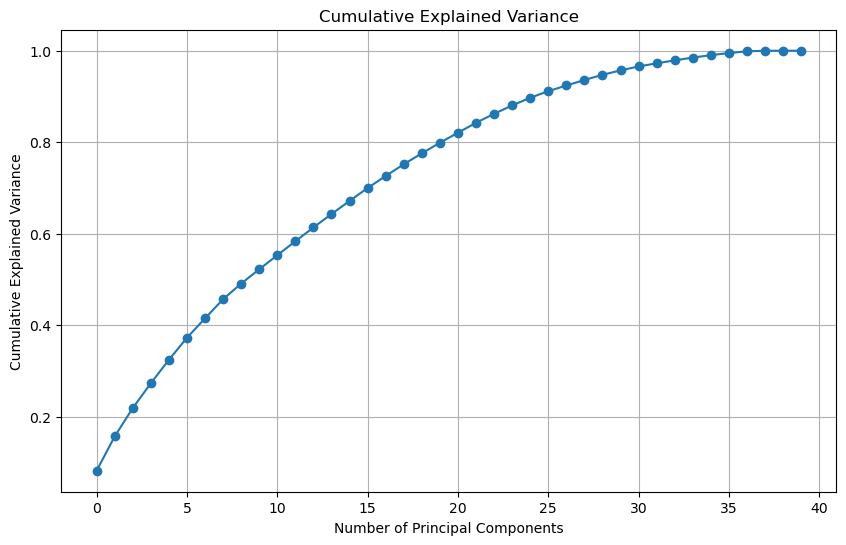

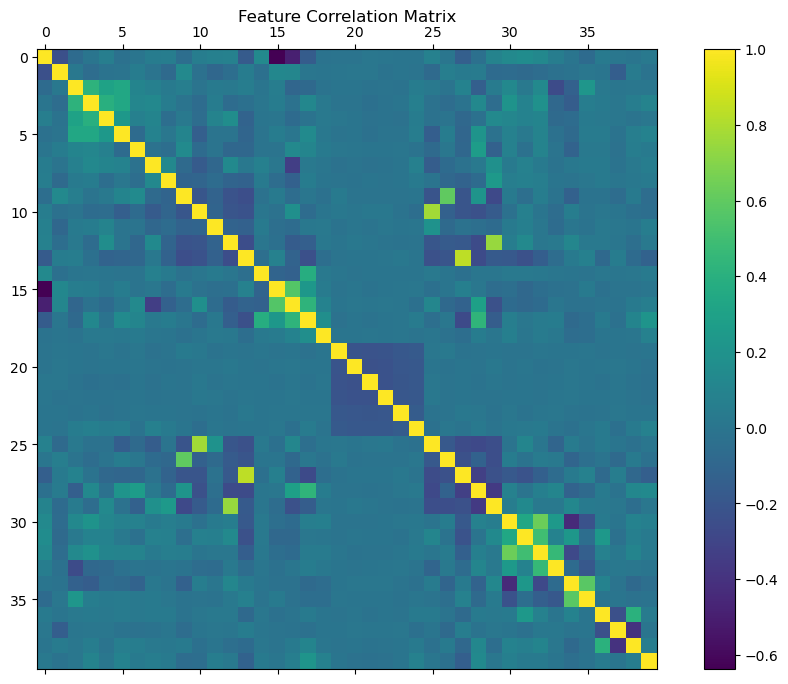

   Principal Component  Explained Variance Ratio  Cumulative Variance
0                  PC1              8.145308e-02             0.081453
1                  PC2              7.494789e-02             0.156401
2                  PC3              6.210407e-02             0.218505
3                  PC4              5.421797e-02             0.272723
4                  PC5              5.134005e-02             0.324063
5                  PC6              4.815088e-02             0.372214
6                  PC7              4.257908e-02             0.414793
7                  PC8              4.176341e-02             0.456556
8                  PC9              3.410073e-02             0.490657
9                 PC10              3.133574e-02             0.521993
10                PC11              3.074789e-02             0.552741
11                PC12              3.053773e-02             0.583279
12                PC13              3.016479e-02             0.613443
13                PC

In [40]:
from sklearn.decomposition import PCA

# Step 1: Load and preprocess the data
numeric_data = df.select_dtypes(include=['float64', 'int64'])

# Standardize the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(numeric_data)

# Step 2: Perform PCA
pca = PCA()
pca_result = pca.fit_transform(normalized_data)

# Explained variance
explained_variance = pca.explained_variance_ratio_

# Step 3: Visualize Explained Variance
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance), marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

# Step 4: Visualize Correlation Matrix (optional)
correlation_matrix = pd.DataFrame(normalized_data, columns=numeric_data.columns).corr()
plt.figure(figsize=(12, 8))
plt.matshow(correlation_matrix, fignum=1)
plt.colorbar()
plt.title('Feature Correlation Matrix', pad=20)
plt.show()

# Step 5: PCA Results Analysis
# Convert PCA results to DataFrame for easier interpretation
pca_columns = [f'PC{i+1}' for i in range(pca_result.shape[1])]
pca_df = pd.DataFrame(pca_result, columns=pca_columns)

# Show the explained variance ratio and cumulative variance
pca_summary = pd.DataFrame({
    'Principal Component': pca_columns,
    'Explained Variance Ratio': explained_variance,
    'Cumulative Variance': np.cumsum(explained_variance)
})

print(pca_summary)


In [41]:
nom_vals = list(np.where(df['shares']<=1400, 'r', 'b'))
data3 = np.array(pca_result)

/var/folders/f7/rm67b76j58gddsmn789xv4rw0000gp/T/ipykernel_3385/191307138.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  sc = ax.scatter(data3[:, 1], data3[:, 0], data3[:, 2], c=nom_vals, cmap='viridis')
/var/folders/f7/rm67b76j58gddsmn789xv4rw0000gp/T/ipykernel_3385/191307138.py:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter([], [], [], c=sc.cmap(sc.norm(i)), label=label)  # Dummy scatter for legend


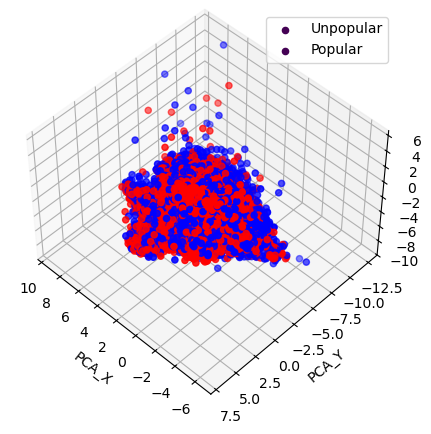

In [42]:
#Plotting principal components in 3D.
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(8, 5))
ax = fig.add_subplot(111, projection='3d', elev=48, azim=134)

# Scatter plot
sc = ax.scatter(data3[:, 1], data3[:, 0], data3[:, 2], c=nom_vals, cmap='viridis')
ax.set_xlabel("PCA_X")
ax.set_ylabel("PCA_Y")
ax.set_zlabel("PCA_Z")

# Adding a legend
legend_labels = ['Unpopular', 'Popular']
for i, label in enumerate(legend_labels):
    ax.scatter([], [], [], c=sc.cmap(sc.norm(i)), label=label)  # Dummy scatter for legend

ax.legend()
plt.show()

/var/folders/f7/rm67b76j58gddsmn789xv4rw0000gp/T/ipykernel_3385/368653838.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data3[:, 0], data3[:, 1], c=nom_vals, cmap='viridis')


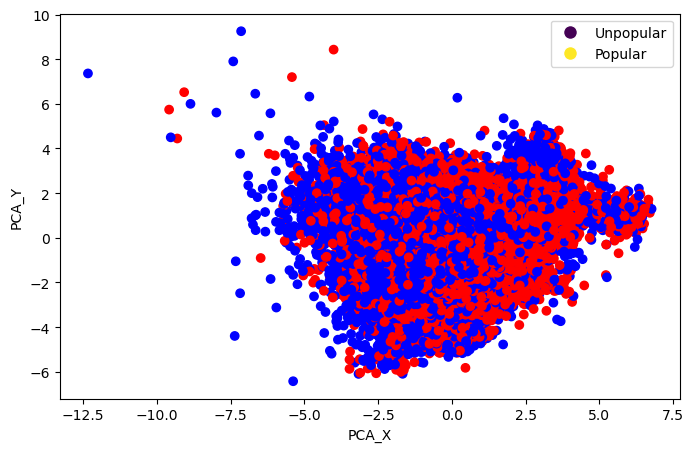

In [43]:
fig = plt.figure(1, figsize=(8, 5))

# Scatter plot
plt.scatter(data3[:, 0], data3[:, 1], c=nom_vals, cmap='viridis')
plt.xlabel("PCA_X")
plt.ylabel("PCA_Y")

# Add legend
legend_labels = ['Unpopular', 'Popular']
handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, 
                      markersize=10, markerfacecolor=plt.cm.viridis(i/1)) for i, label in enumerate(legend_labels)]
plt.legend(handles=handles)

plt.show()

In [44]:
# Retain components explaining 95% of the variance
n_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1
print(f"Number of components to retain 95% variance: {n_components}")

Number of components to retain 95% variance: 30


In [45]:
X = df.drop('shares', axis=1)
y = df['shares']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA with 30 components
pca_30 = PCA(n_components=n_components)
X_pca_30 = pca_30.fit_transform(X_scaled)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca_30, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Evaluate the model
xgb_model_metrics = evaluate_model(X_test, y_test, y_pred, plot_results=False)


Model Evaluation Metrics:
Mean Absolute Error (MAE): 1732.2762
Mean Squared Error (MSE): 6312875.0099
Root Mean Squared Error (RMSE): 2512.5435
Mean Absolute Percentage Error (MAPE): 1.1532
R-Squared (R²): 0.0854


In [46]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Step 1: Apply Log Transformation to 'shares' (target variable)
y_log = np.log1p(y)  # log(1 + x) to handle zeros

# Step 2: Generate Polynomial Features
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_poly = poly.fit_transform(X)

# Standardize polynomial features
X_poly_scaled = scaler.fit_transform(X_poly)

# Reapply PCA on polynomial features
X_poly_pca_30 = pca_30.fit_transform(X_poly_scaled)

# Split the data with polynomial features
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(
    X_poly_pca_30, y_log, test_size=0.2, random_state=42
)

# Step 3: Train and Evaluate Multiple Models
models = {
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBoost Regressor": XGBRegressor()
}

# Dictionary to store results
results = {}

In [47]:
# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_poly, y_train_poly)  # Train model
    y_pred = model.predict(X_test_poly)  # Predict on test set
    
    # Calculate metrics
    mse = mean_squared_error(np.expm1(y_test_poly), np.expm1(y_pred))  # Reverse log transformation for comparison
    r2 = r2_score(np.expm1(y_test_poly), np.expm1(y_pred))
    mae = mean_absolute_error(np.expm1(y_test_poly), np.expm1(y_pred))  # Mean Absolute Error
    rmse = np.sqrt(mse)                       # Root Mean Squared Error
    mape = mean_absolute_percentage_error(np.expm1(y_test_poly), np.expm1(y_pred))  # Mean Absolute Percentage Error
    
    results[name] = {"MAE": mae, "MSE": mse, "RMSE": rmse, "R²": r2, "MAPE": mape}

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results).T

[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  22.7s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=  30.6s
[CV] END bootstrap=False, max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   8.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   1.9s
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   7.7s
[CV] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=  10.3s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=  10.8s
[CV] END bootstrap=False, max_depth=20, max

In [48]:
results_df

,MAE,MSE,RMSE,R²,MAPE
Ridge Regression,1517.976031,7.049596e+06,2655.107492,-0.021389,0.721170
Lasso Regression,1582.924086,7.502718e+06,2739.109058,-0.087040,0.777946
Random Forest Regressor,1502.801298,6.759886e+06,2599.977990,0.020586,0.724520
XGBoost Regressor,1531.892481,6.882301e+06,2623.413956,0.002850,0.749911


In [49]:
pip freeze | grep -v @ > requirements.txt

Note: you may need to restart the kernel to use updated packages.
